In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

In [ ]:
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
# Obtener la informacion
scripts = soup.find_all("script")
for script in scripts:
  # Seleccionar el script que nos interesa
  if (script.get_text().find("Daily New Cases") > 0):
    index_daily_chart = script.get_text().find("Daily New Cases")
    # Empezamos a buscar el numero de casos y fechas, a partir de donde se encontró la gráfica que nos interesaa
    index_categories = script.get_text().find("categories", index_daily_chart)
    index_categories_start  = script.get_text().find("[", index_categories)
    index_categories_end = script.get_text().find("]", index_categories)
    index_data = script.get_text().find("data", index_daily_chart)
    index_data_start = script.get_text().find("[", index_data)
    index_data_end = script.get_text().find("]", index_data)
    # Pasamos la informacion en formato string a list
    date = script.get_text()[index_categories_start+1:index_categories_end].split(',')
    cases_string = script.get_text()[index_data_start+1:index_data_end].split(',')
    # Pulimos detalles para que este en el formato que queremos
    date = [ i[1:-1] for i in date]
    cases = [ None if (i == "null") else int(i) for i in cases_string]
    print(date)
    print(cases)
    print(len(date))
    print(len(cases))

['Jan 22', 'Jan 23', 'Jan 24', 'Jan 25', 'Jan 26', 'Jan 27', 'Jan 28', 'Jan 29', 'Jan 30', 'Jan 31', 'Feb 01', 'Feb 02', 'Feb 03', 'Feb 04', 'Feb 05', 'Feb 06', 'Feb 07', 'Feb 08', 'Feb 09', 'Feb 10', 'Feb 11', 'Feb 12', 'Feb 13', 'Feb 14', 'Feb 15', 'Feb 16', 'Feb 17', 'Feb 18', 'Feb 19', 'Feb 20', 'Feb 21', 'Feb 22', 'Feb 23', 'Feb 24', 'Feb 25', 'Feb 26', 'Feb 27', 'Feb 28', 'Feb 29', 'Mar 01', 'Mar 02', 'Mar 03', 'Mar 04', 'Mar 05', 'Mar 06', 'Mar 07', 'Mar 08', 'Mar 09', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13', 'Mar 14', 'Mar 15', 'Mar 16', 'Mar 17', 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21', 'Mar 22', 'Mar 23', 'Mar 24', 'Mar 25', 'Mar 26', 'Mar 27', 'Mar 28', 'Mar 29', 'Mar 30', 'Mar 31', 'Apr 01', 'Apr 02', 'Apr 03', 'Apr 04', 'Apr 05', 'Apr 06', 'Apr 07', 'Apr 08', 'Apr 09', 'Apr 10', 'Apr 11', 'Apr 12', 'Apr 13', 'Apr 14', 'Apr 15', 'Apr 16', 'Apr 17', 'Apr 18', 'Apr 19', 'Apr 20', 'Apr 21', 'Apr 22', 'Apr 23', 'Apr 24', 'Apr 25', 'Apr 26', 'Apr 27', 'Apr 28', 'Apr 29', 'Apr 30',

([<matplotlib.axis.XTick at 0x7fa010736358>,
 <a list of 13 Text major ticklabel objects>)

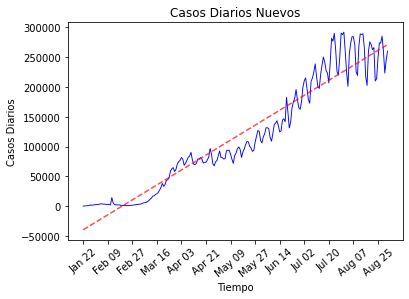

In [ ]:
from sklearn.linear_model import LinearRegression

#Eliminamos los NaN de las listas
cases[0]=0

#Ajustamos los datos para graficar
x = list(range(len(cases)))
x=np.array(x)
x=x.reshape(-1,1)

#Graficamos los datos originales y la regresión
plt.plot(date,cases, color='b',  linewidth=.9)

lr = LinearRegression()
lr.fit(x, cases)

fy = lr.coef_*x + lr.intercept_
plt.plot(x, fy, '--', alpha=.7, color="red" )
plt.xlabel("Tiempo")
plt.ylabel("Casos Diarios")
plt.title("Casos Diarios Nuevos")
plt.xticks(np.arange(min(x), max(x)+1, len(cases)//12), rotation=40)